In [2]:
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import sem
from cpsplines.mosek_functions.interval_constraints import IntConstraints
from cpsplines.psplines.bspline_basis import BsplineBasis
from cpsplines.psplines.penalty_matrix import PenaltyMatrix
from cpsplines.fittings.fit_cpsplines import CPsplines
from cpsplines.utils.gcv import GCV
import statsmodels.genmod.families.family
import mosek.fusion as mf

from Functions import poly

from Functions import simpleGCV
from Functions import choose_lambda
from Functions import simpson_spline_full
from Functions import simpson_spline_matrices
from Functions import intGCV
from Functions import choose_lambda_int
from Functions import create_obj_mat
from Functions import unconstrained_sof_fit
from Functions import cp_sof_fit
import time
from scipy.stats import norm
from scipy.stats import pareto

## ERROR SIGUE UNA $N(0, 0.01)$

In [8]:
import csv
import pandas as pd
i=1
T = np.linspace(0.05, 1, num=50)
T2 = np.linspace(0.05,  1, num=501)
ssss="_".join(['X', str(i)])
tttt="_".join(['y', str(i)])
X = pd.read_csv("".join([ssss,'.csv']), header=None )
y = pd.read_csv("".join([tttt,'.csv']), header=None )
y=np.array(y)
X=np.array(X)
y.squeeze()
betaT=pd.read_csv("beta.csv", header=None )
betaT=np.array(betaT).squeeze()
betaT2=pd.read_csv("beta2.csv", header=None )
betaT2=np.array(betaT2).squeeze()
# "_".join(['X', str(i+1), str(N)])
# "_".join(['y', str(i+1), str(N)])

In [9]:
imse_cons_pareto_nonneg_ellos=np.array([10.75196, 10.43598,  9.63650, 10.51186, 10.07906, 10.71476, 10.81782, 10.35835, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646,
10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436,
10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140,
10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536,
10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034,
10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646,
10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436,
10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140,
10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536,
10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034, 10.13646, 10.25436, 10.48140, 10.92536, 10.43034])


mse_cons_pareto_nonneg_ellos =np.array([ 0.3319387, 0.3192479, 0.2548696, 0.3250896, 0.2967607, 0.3029809, 0.3365828, 0.3413915, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346,
0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043,
0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677,
0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079,
0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789,
0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346,
0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043,
0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677,
0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079,
0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789,
0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789, 0.2970079, 0.3095677, 0.3374043, 0.3246346, 0.3374789])


imse_uncons_pareto_nonneg_ellos = np.array([ 0.03225741, 0.02885842, 0.02805617, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226,
0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103,
0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712,
0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895,
0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248,
0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226,
0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103,
0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712,
0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895,
0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248,
0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226,
0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103,
0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712,
0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895,
0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248,
0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226,
0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103,
0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712, 0.03297895, 0.03098248, 0.02966226, 0.03183103, 0.02901712,
0.03297895, 0.03098248])

mse_uncons_pareto_nonneg_ellos = np.array([ 0.08971947, 0.08581602, 0.07776280, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666,
0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139,
0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972,
0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479,
0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622,
0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666,
0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139,
0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972,
0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479,
0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622,
0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666,
0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139,
0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972,
0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479,
0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622,
0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666,
0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139,
0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972, 0.06421479, 0.07520622, 0.07922666, 0.07890139, 0.07933972,
0.06421479, 0.07520622])

In [10]:
import warnings
warnings.filterwarnings('ignore')

Unconstrained: $\epsilon \sim N(0,0.01)$

IMSE for N= 35 9.670172968459106
MSE for N= 35 0.08768961620640271
Standard deviation of the IMSE: 0.04302899752412806
Standard deviation of the MSE: 0.0022357661727455715
IMSE for N= 75 10.182963071906551
MSE for N= 75 0.11169207247217552
Standard deviation of the IMSE: 0.04646147710374532
Standard deviation of the MSE: 0.001677329239600075
IMSE for N= 125 10.124629209048823
MSE for N= 125 0.09931036524516798
Standard deviation of the IMSE: 0.020650067598710877
Standard deviation of the MSE: 0.0007991136746393104


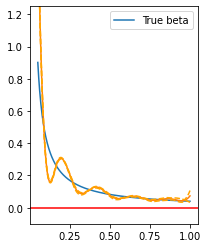

Times [ 85.91911697 157.70124578 243.39032125]


In [22]:
############################################################################
#ESTO PARA NUESTRO PROBLEMA
np.random.seed(1)
n_sims = 200

fitted_means_matrix = np.zeros((n_sims, 501))
lower_ci_matrix = np.zeros((n_sims, 501))
upper_ci_matrix = np.zeros((n_sims, 501))

time_unconstrained = np.zeros(3)

IMSE_uncons=np.zeros(n_sims)
MSE_uncons=np.zeros(n_sims)

cont=0
for N in [35, 75, 125]:
    start_time = time.time()

    for i in range(n_sims):
        #Trabajaremos con estos datos
        
        ssss="_".join(['X', str(i+1), str(N)])
        tttt="_".join(['y', str(i+1), str(N)])
        X = pd.read_csv("".join([ssss,'.csv']), header=None )
        y = pd.read_csv("".join([tttt,'.csv']), header=None )
        y=np.array(y).squeeze()
        X=np.array(X)

        
        y_hat, betagorro = unconstrained_sof_fit(X=X, y=y, k=15, initial_grid=T, newgrid_size=501, plot=False)
        #plt.figure(figsize=(3,4))
        #plt.plot(T2, betaT2, label = 'True beta')
        #plt.plot(T2,betagorro, label=f'approx {i+1}')
        #plt.axhline(0, color='red')
        #plt.ylim([-0.2, 1])
        #plt.legend()
        #plt.show()
        #plt.figure(figsize=(3,4))
        #plt.plot(np.linspace(0,1, num=len(y)), y, label = 'True y')
        #plt.plot(np.linspace(0,1, num=len(y_hat)), y_hat, label=f'approx {i+1}')
        #plt.axhline(0, color='red')
        #plt.ylim([0.05, 0.3])
        #plt.legend()
        #plt.show()
        # Store fitted values in matrix
        fitted_means_matrix[i,:] = betagorro.reshape((501,))
    
        #IMSE
        IMSE_uncons[i] = (W @ (betaT2-betagorro)**2).sum()
        MSE_uncons[i] = np.mean((y-y_hat)**2)
    print('IMSE for N=',N,  IMSE_uncons.sum()/n_sims*1000)
    print('MSE for N=',N,  MSE_uncons.sum()/n_sims*1000)
    print('Standard deviation of the IMSE:', sem(IMSE_uncons*1000))
    print('Standard deviation of the MSE:', sem(MSE_uncons*1000))
    end_time = time.time()
    time_unconstrained[cont] = end_time - start_time
    cont+=1
mean_fitted_vals = np.mean(fitted_means_matrix, axis=0)
mean_lower_ci = np.quantile(fitted_means_matrix, 0.025, axis=0)
mean_upper_ci = np.quantile(fitted_means_matrix, 0.975, axis=0)

plt.figure(figsize=(3,4))
plt.plot(T2, betaT2, label = 'True beta')
plt.plot(T2,mean_fitted_vals)
plt.plot(T2,mean_lower_ci, linestyle='dashed', color='orange')
plt.plot(T2,mean_upper_ci, linestyle='dashed', color='orange')
# Plot a horizontal line at y=0
plt.axhline(0, color='red')
plt.ylim([-0.1, 1.25])
plt.legend()
plt.show()
print('Times', time_unconstrained)

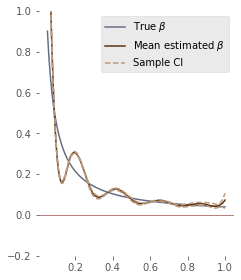

In [54]:
plt.figure(figsize=(3.5,4.5))
plt.plot(T2, betaT2, label = r"True $\beta $", color='#666E86')
plt.plot(T2,mean_fitted_vals, label=r"Mean estimated $\beta $", color='#5F3108')
plt.plot(T2,mean_lower_ci, linestyle='dashed', color='#B99B81', label='Sample CI')
plt.plot(T2,mean_upper_ci, linestyle='dashed', color='#B99B81')
# Plot a horizontal line at y=0
plt.axhline(0, color='#780000', linewidth=0.5)
plt.ylim([-0.2, 1])
plt.legend()
plt.style.use('ggplot')
plt.box(False)
plt.savefig('pareto_uncons.png', transparent=True)
plt.show()

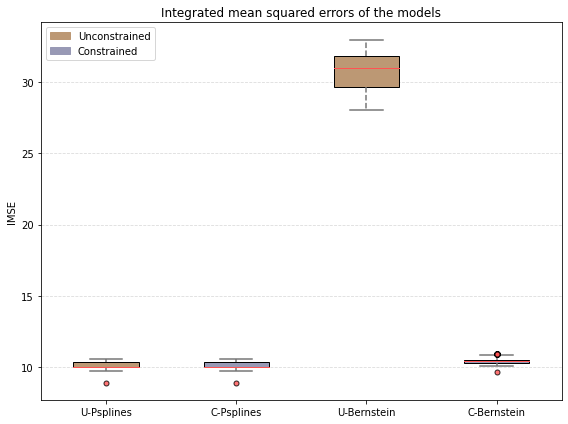

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Generate random data
np.random.seed(1)


# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize boxplot colors
box_colors = ['#BC9874', '#9899B5', '#BC9874', '#9899B5']
box_labels = ['U-Psplines', 'C-Psplines', 'U-Bernstein', 'C-Bernstein']
legend_labels = ['Unconstrained', 'Constrained']
# Create boxplot
boxplot = ax.boxplot([IMSE_cons*1000, IMSE_uncons*1000, imse_uncons_pareto_nonneg_ellos*1000, imse_cons_pareto_nonneg_ellos,], patch_artist=True, widths=0.5)

# Set boxplot style
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)

# Set whisker and cap style
for whisker, cap in zip(boxplot['whiskers'], boxplot['caps']):
    whisker.set(color='#757575', linewidth=1.5, linestyle='--')
    cap.set(color='#757575', linewidth=1.5)

# Set median line style
for median in boxplot['medians']:
    median.set(color='#FF5252', linewidth=1)

# Set outliers style
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=5, markerfacecolor='#FF5252', alpha=0.8)

# Create custom legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_colors, legend_labels)]
legend_patchess = [legend_patches[0], legend_patches[1]]
ax.legend(handles=legend_patchess, loc='upper left')

# Set axis labels and title
ax.set_xticklabels(box_labels)
ax.set_ylabel('IMSE')
ax.set_title('Integrated mean squared errors of the models')

# Customize grid appearance
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.8)

# Adjust the plot layout
fig.tight_layout()
plt.box(True)
plt.savefig('paretitoimse.png', transparent=True)
# Show the plot
plt.show()

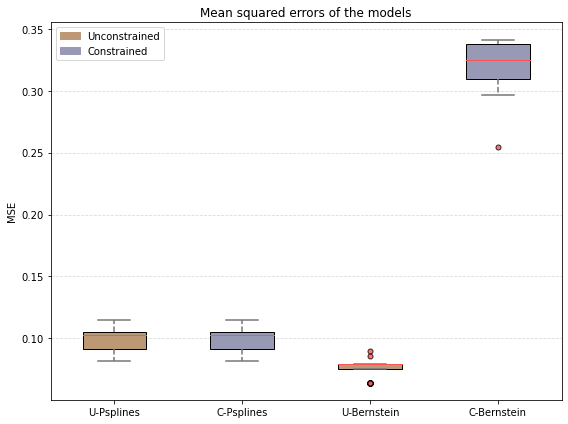

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Generate random data
np.random.seed(1)


# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize boxplot colors
box_colors = ['#BC9874', '#9899B5', '#BC9874', '#9899B5']
box_labels = ['U-Psplines', 'C-Psplines', 'U-Bernstein', 'C-Bernstein']
legend_labels = ['Unconstrained', 'Constrained']
# Create boxplot
boxplot = ax.boxplot([MSE_cons*1000, MSE_uncons*1000, mse_uncons_pareto_nonneg_ellos, mse_cons_pareto_nonneg_ellos,], patch_artist=True, widths=0.5)

# Set boxplot style
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)

# Set whisker and cap style
for whisker, cap in zip(boxplot['whiskers'], boxplot['caps']):
    whisker.set(color='#757575', linewidth=1.5, linestyle='--')
    cap.set(color='#757575', linewidth=1.5)

# Set median line style
for median in boxplot['medians']:
    median.set(color='#FF5252', linewidth=1)

# Set outliers style
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=5, markerfacecolor='#FF5252', alpha=0.8)

# Create custom legend
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(box_colors, legend_labels)]
legend_patchess = [legend_patches[0], legend_patches[1]]
ax.legend(handles=legend_patchess, loc='upper left')

# Set axis labels and title
ax.set_xticklabels(box_labels)
ax.set_ylabel('MSE')
ax.set_title('Mean squared errors of the models')

# Customize grid appearance
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.8)

# Adjust the plot layout
fig.tight_layout()
plt.box(True)
plt.savefig('paretitomse.png', transparent=True)
# Show the plot
plt.show()

### Cálculo del IMSE y del MSE

Constrained: $\epsilon \sim N(0,0.01)$

IMSE for N= 35 9.660708796398833
MSE for N= 35 0.08772623920049179
Standard deviation of the IMSE: 0.0423773901784713
Standard deviation of the MSE: 0.002235617417643917
IMSE for N= 75 10.183075811270337
MSE for N= 75 0.11169197419075474
Standard deviation of the IMSE: 0.04645778844164741
Standard deviation of the MSE: 0.001677312355149187
IMSE for N= 125 10.124283956067593
MSE for N= 125 0.0993104241345715
Standard deviation of the IMSE: 0.020625947449745587
Standard deviation of the MSE: 0.0007991154583843621


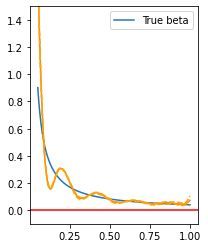

Times [ 89.27520752 158.05930829 242.69469929]


In [20]:
#############################################################################
#ESTO PARA NUESTRO PROBLEMA
np.random.seed(1)
n_sims = 200

fitted_means_matrix = np.zeros((n_sims, 501))
lower_ci_matrix = np.zeros((n_sims, 501))
upper_ci_matrix = np.zeros((n_sims, 501))

time_constrained = np.zeros(3)

IMSE_cons=np.zeros(n_sims)
MSE_cons=np.zeros(n_sims)

cont=0
for N in [35, 75, 125]:
    start_time = time.time()
    for i in range(n_sims):
        #Trabajaremos con estos datos
        ssss="_".join(['X', str(i+1), str(N)])
        tttt="_".join(['y', str(i+1), str(N)])
        X = pd.read_csv("".join([ssss,'.csv']), header=None )
        y = pd.read_csv("".join([tttt,'.csv']), header=None )
        y=np.array(y).squeeze()
        X=np.array(X)
        
        y_hat, theta0, betagorro = cp_sof_fit(X=X, y=y, k=15, initial_grid=T, newgrid_size=501, derivative_order=0, sign='+', sign_threshold=0.0,  plot=False)
        # Store fitted values in matrix
        fitted_means_matrix[i,:] = betagorro.reshape((501,))
    
        #IMSE
        IMSE_cons[i] = (W @ (betaT2-betagorro)**2).sum()
        #MSE
        MSE_cons[i] = np.mean((y-y_hat)**2)
    print('IMSE for N=',N,  IMSE_cons.sum()/n_sims*1000)
    print('MSE for N=',N,  MSE_cons.sum()/n_sims*1000)
    print('Standard deviation of the IMSE:', sem(IMSE_cons*1000))
    print('Standard deviation of the MSE:', sem(MSE_cons*1000))
    end_time = time.time()
    time_constrained[cont] = end_time - start_time
    cont+=1
mean_fitted_vals = np.mean(fitted_means_matrix, axis=0)
mean_lower_ci = np.quantile(fitted_means_matrix, 0.025, axis=0)
mean_upper_ci = np.quantile(fitted_means_matrix, 0.975, axis=0)

plt.figure(figsize=(3,4))
plt.plot(T2, betaT2, label = 'True beta')
plt.plot(T2,mean_fitted_vals)
plt.plot(T2,mean_lower_ci, linestyle='dashed', color='orange')
plt.plot(T2,mean_upper_ci, linestyle='dashed', color='orange')
# Plot a horizontal line at y=0
plt.axhline(0, color='red')
plt.ylim([-0.1, 1.25])
plt.legend()
plt.show()
print('Times', time_constrained)

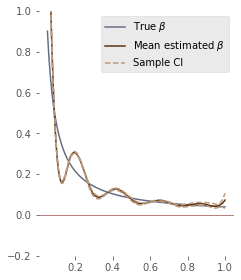

In [53]:
plt.figure(figsize=(3.5,4.5))
plt.plot(T2, betaT2, label = r"True $\beta $", color='#666E86')
plt.plot(T2,mean_fitted_vals, label=r"Mean estimated $\beta $", color='#5F3108')
plt.plot(T2,mean_lower_ci, linestyle='dashed', color='#B99B81', label='Sample CI')
plt.plot(T2,mean_upper_ci, linestyle='dashed', color='#B99B81')
# Plot a horizontal line at y=0
plt.axhline(0, color='#780000', linewidth=0.5)
plt.ylim([-0.2, 1])
plt.legend()
plt.style.use('ggplot')
plt.box(False)
plt.savefig('pareto_cons_0.01.png', transparent=True)
plt.show()